In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('BigmartSales.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


NOTICE there are some missing values!

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## Observations:
- mean seales is 2191.29 with a standard deviation of 1706, which is a lot
- Item_visibility = % of the total display area of all products in a store allocated to the particular product

In [6]:
find_null = data.isnull().sum()
find_null

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We need to do something with these null values 

<Axes: xlabel='Outlet_Type', ylabel='count'>

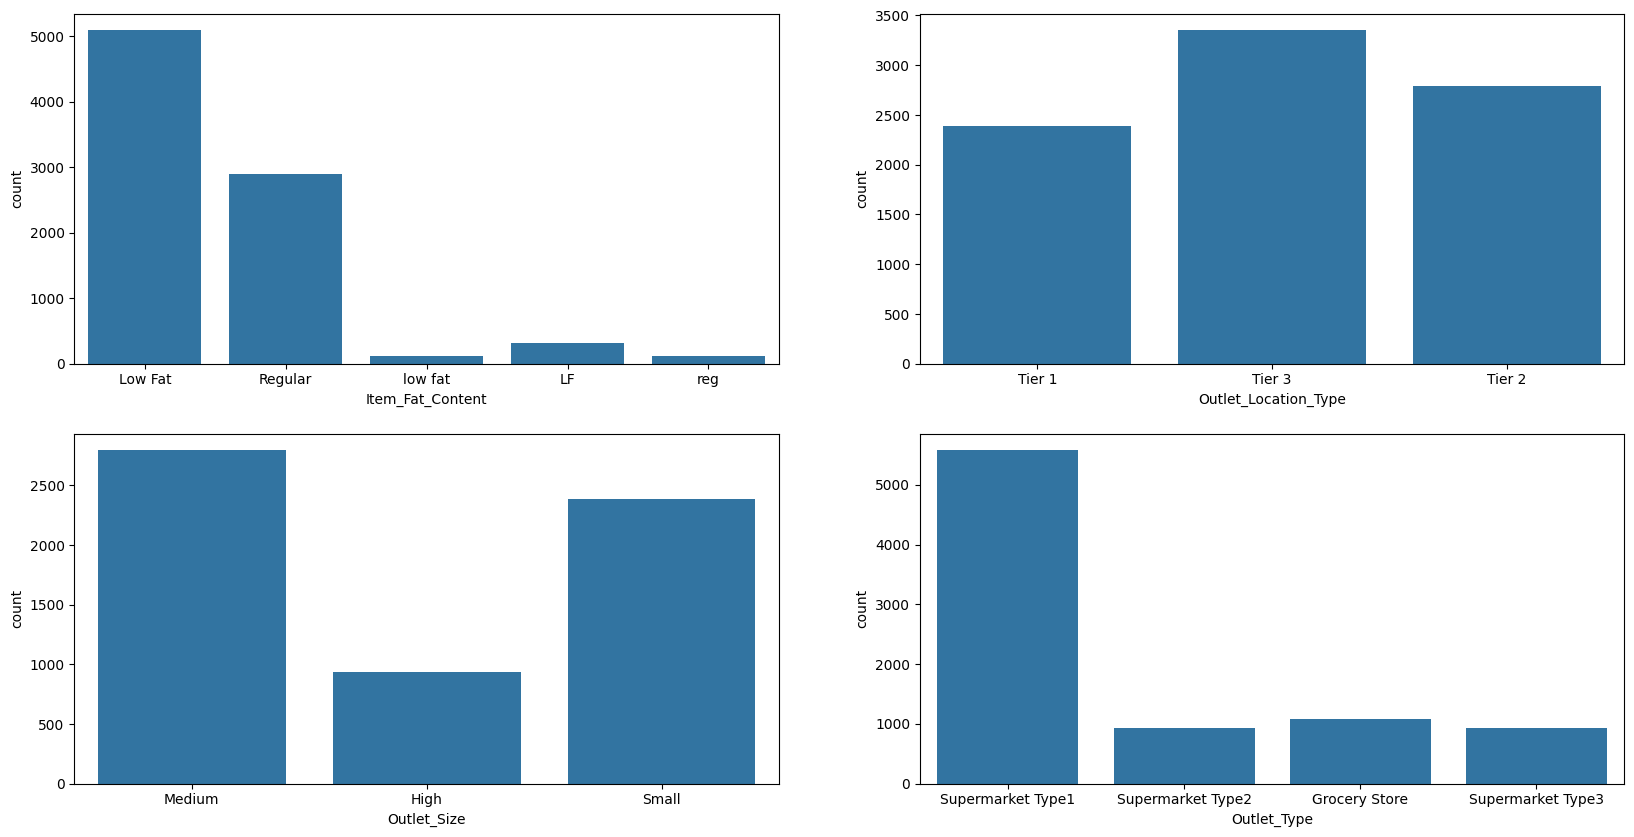

In [7]:
fig, axes = plt.subplots(2,2, figsize = (20, 10))
sns.countplot(ax = axes[0,0], x = 'Item_Fat_Content', data = data)
sns.countplot(ax = axes[1,0], x = 'Outlet_Size', data = data)
sns.countplot(ax = axes[0,1], x = 'Outlet_Location_Type', data = data)
sns.countplot(ax = axes[1,1], x = 'Outlet_Type', data = data)

Appears that Item_Fat_Content categories are labeled incorrectly. There is low fat, LF, and Low Fat / Regular, reg

In [8]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

<Axes: xlabel='Outlet_Type', ylabel='count'>

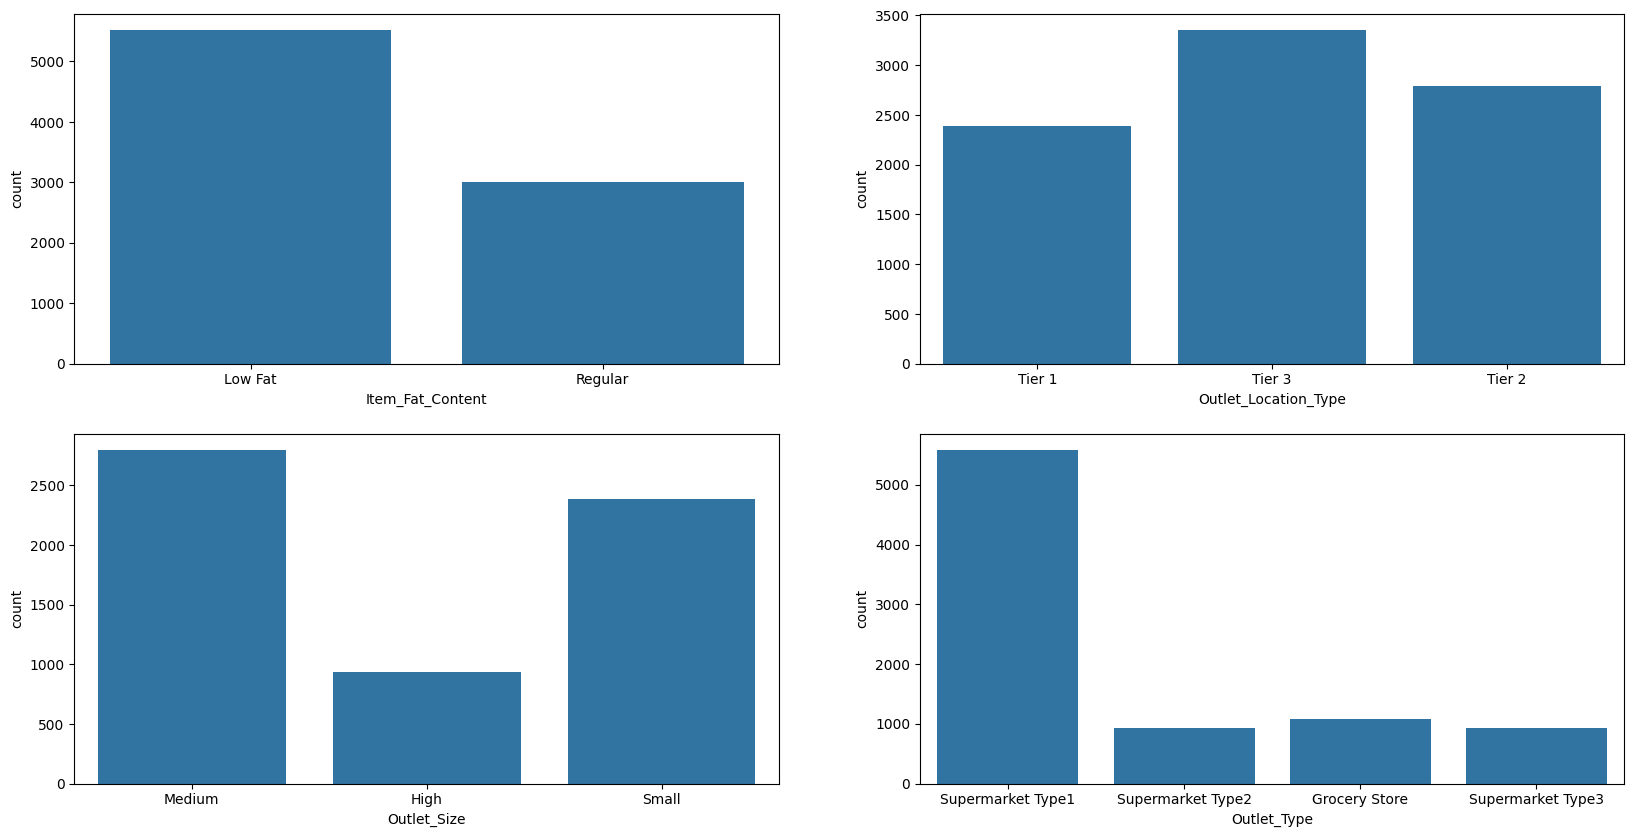

In [9]:
fig, axes = plt.subplots(2,2, figsize = (20, 10))
sns.countplot(ax = axes[0,0], x = 'Item_Fat_Content', data = data)
sns.countplot(ax = axes[1,0], x = 'Outlet_Size', data = data)
sns.countplot(ax = axes[0,1], x = 'Outlet_Location_Type', data = data)
sns.countplot(ax = axes[1,1], x = 'Outlet_Type', data = data)

<Axes: xlabel='Outlet_Size', ylabel='Count'>

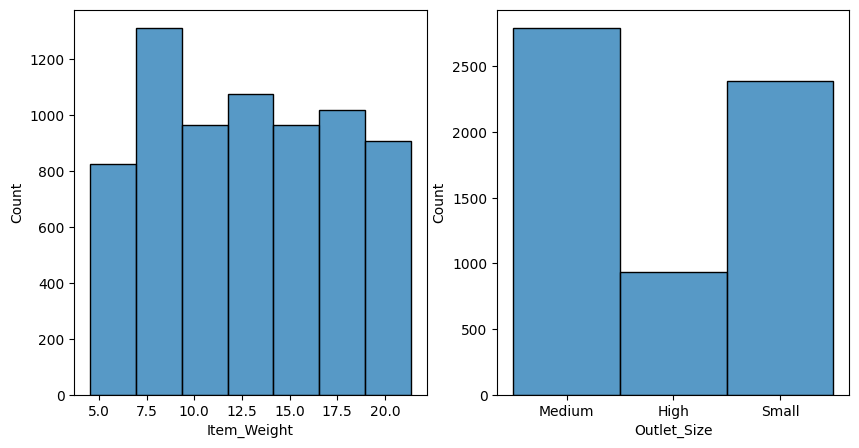

In [10]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(x = 'Item_Weight', data = data, binwidth= 2.5, ax = axes[0])
sns.histplot(x = 'Outlet_Size', data = data, ax = axes[1])


In [11]:
data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Axes: xlabel='Item_Type', ylabel='count'>

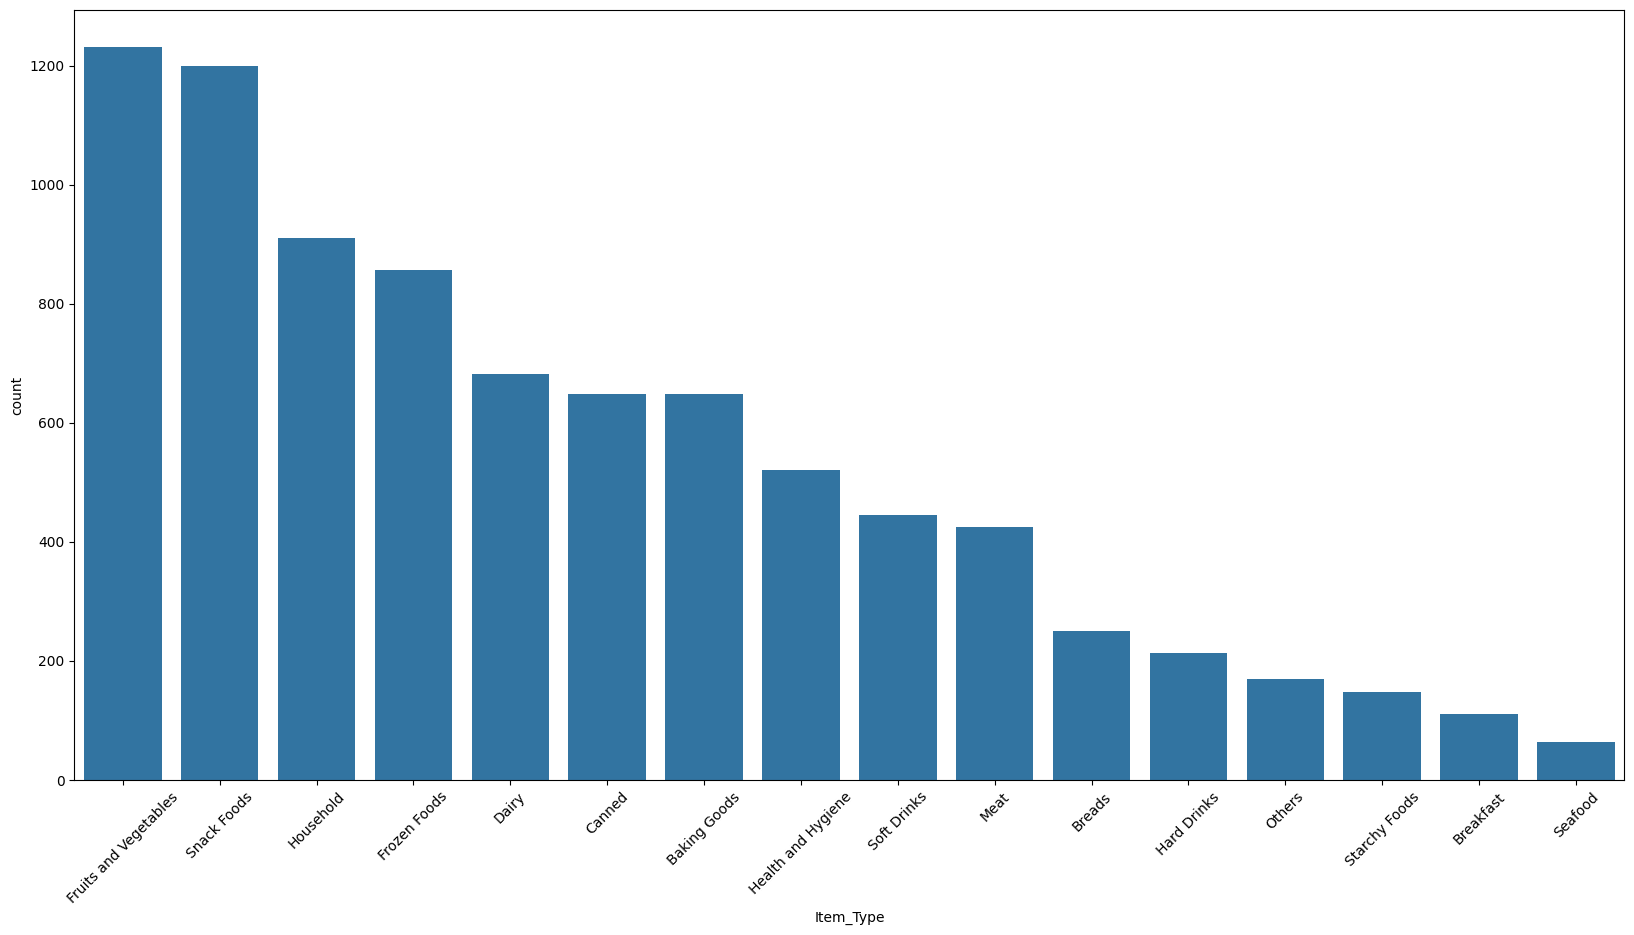

In [12]:
plt.figure(figsize= (20,10))
plt.xticks(rotation = 45)
sns.countplot(x = data.Item_Type, order = data.Item_Type.value_counts().index)

<Axes: xlabel='Item_Visibility', ylabel='Count'>

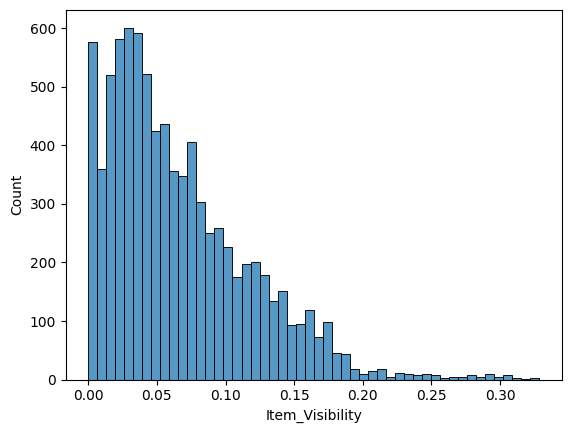

In [13]:
sns.histplot(x = 'Item_Visibility', data = data)

There seems to be a seperation between high and low item visibility at .20

In [14]:
high_visibility = data[data['Item_Visibility'] > .2]
data['Item_Visibility'] = [1 if x > .2 else 0 for x in data['Item_Visibility']]

In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Item_Type', ylabel='count'>

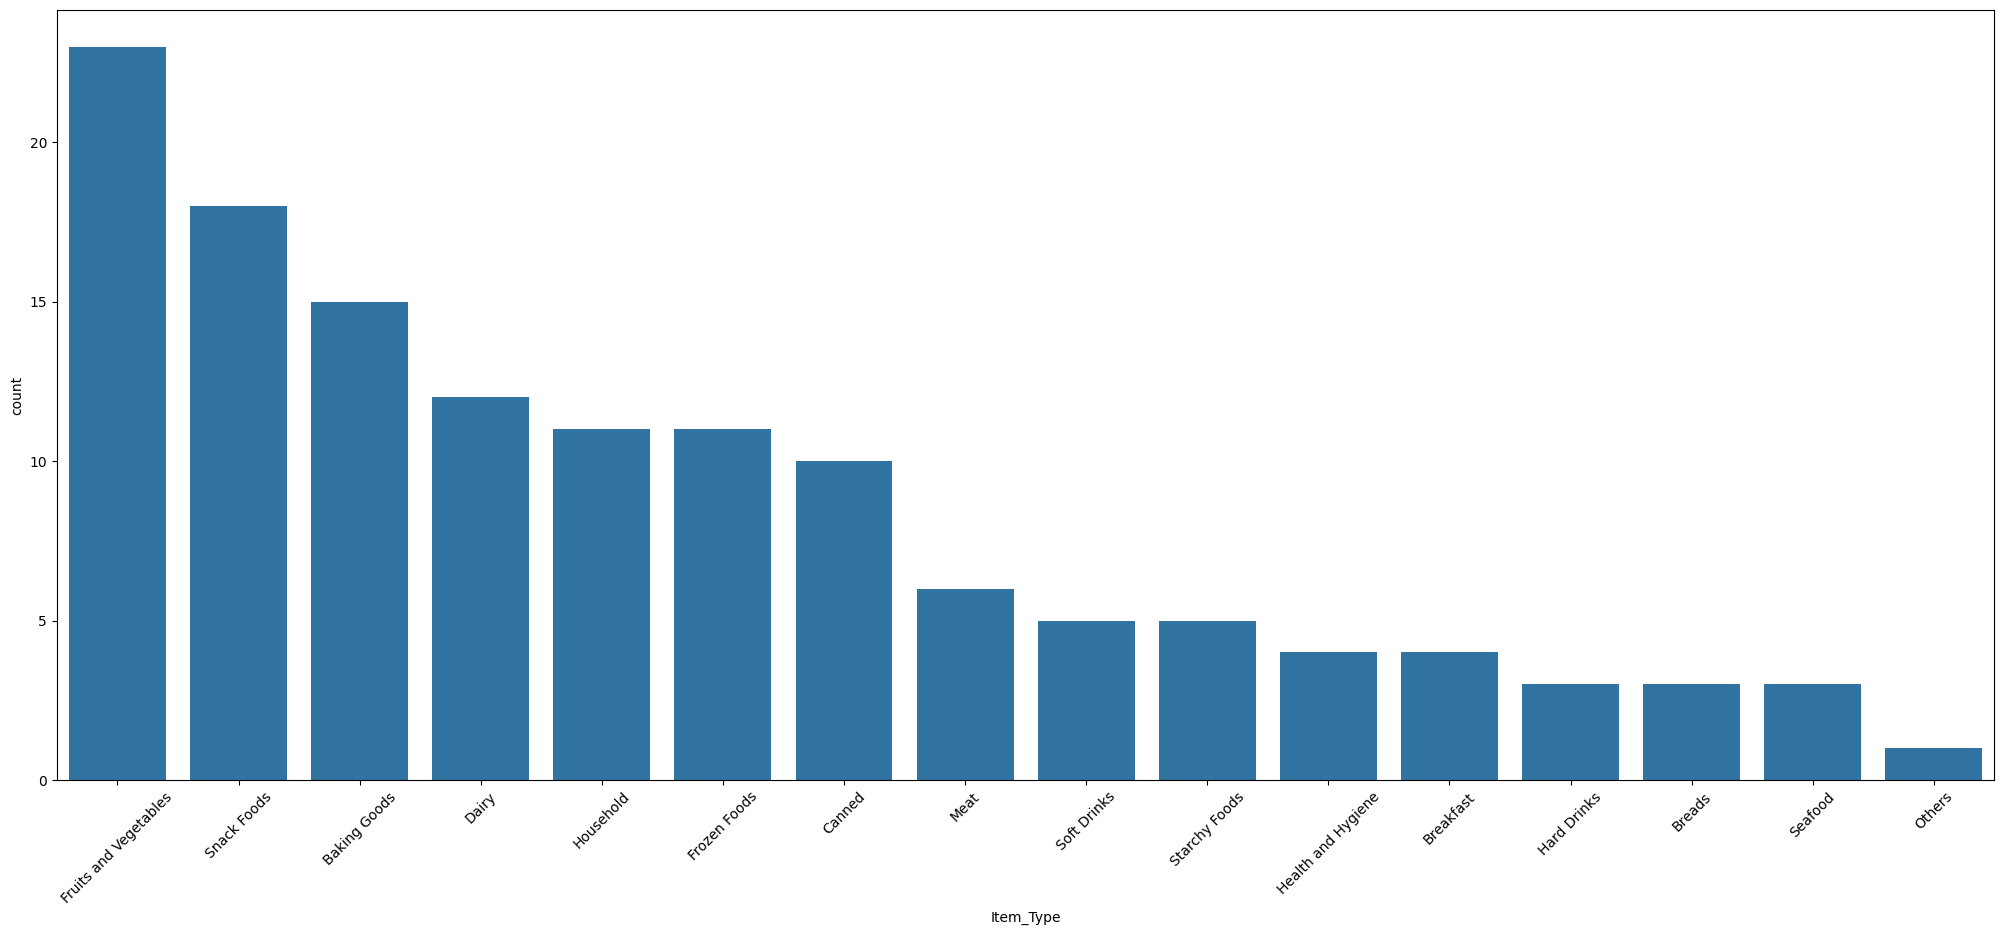

In [16]:
plt.figure(figsize= (25, 10))
plt.xticks(rotation = 45)
sns.countplot(x = high_visibility['Item_Type'], order = high_visibility['Item_Type'].value_counts().index)

C:\Users\19738\AppData\Local\Temp\ipykernel_23852\1535109487.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = data, ci = None, estimator = 'mean')


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

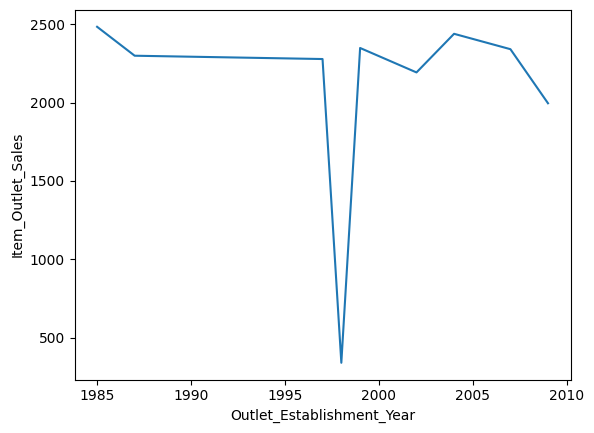

In [17]:
sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = data, ci = None, estimator = 'mean')

<Axes: >

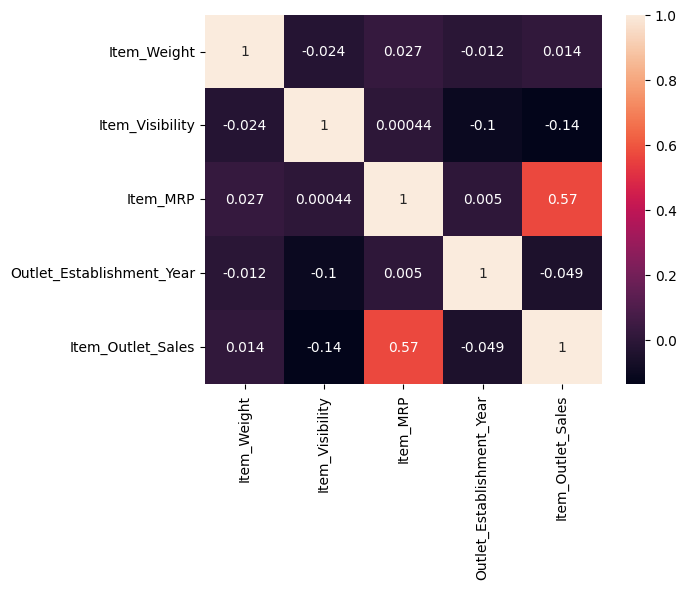

In [18]:
sns.heatmap(data.corr(numeric_only=True), annot = True)

In [19]:
data_null = data.isnull().sum()
data_null


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Since there are 1400 and 2400 data points with null values, we cannot simply replace with one value such as the median or mode because it will throw out distribution off.

In [20]:
data.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [21]:
data.Outlet_Size.describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [22]:
data_null2 = data[data.isnull().any(axis=1)]
data_null2.head()
data_null2.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    562
Snack Foods              544
Household                412
Frozen Foods             379
Dairy                    302
Baking Goods             297
Canned                   288
Health and Hygiene       243
Meat                     204
Soft Drinks              204
Breads                   119
Hard Drinks               97
Others                    78
Starchy Foods             61
Breakfast                 52
Seafood                   31
Name: count, dtype: int64

<Axes: xlabel='Item_Type', ylabel='Item_Fat_Content'>

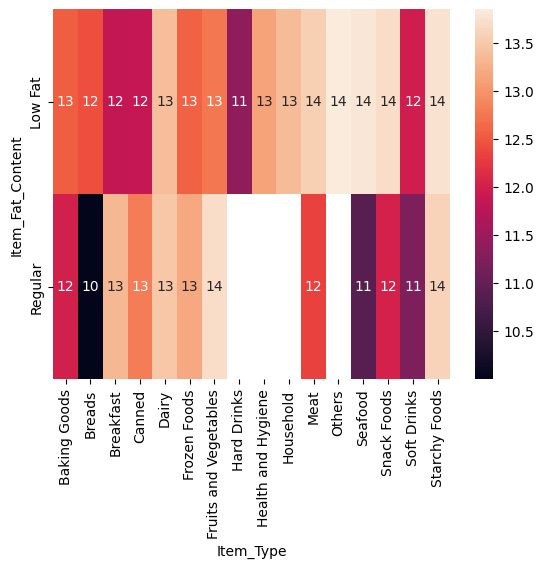

In [23]:
sns.heatmap(data.pivot_table(index = 'Item_Fat_Content', columns = 'Item_Type', values = 'Item_Weight'), annot = True)

In [24]:
null_indices_item_weight = data[data['Item_Weight'].isnull()].index
data.loc[null_indices_item_weight, 'Item_Weight'] = np.random.uniform(10,14, len(null_indices_item_weight))

In [25]:
null_indices_outlet_size = data[data['Outlet_Size'].isnull()].index
data.loc[null_indices_outlet_size, 'Outlet_Size'] = np.random.uniform(10, 14, len(null_indices_outlet_size))

TypeError: 'value' must be an instance of str or bytes, not a float

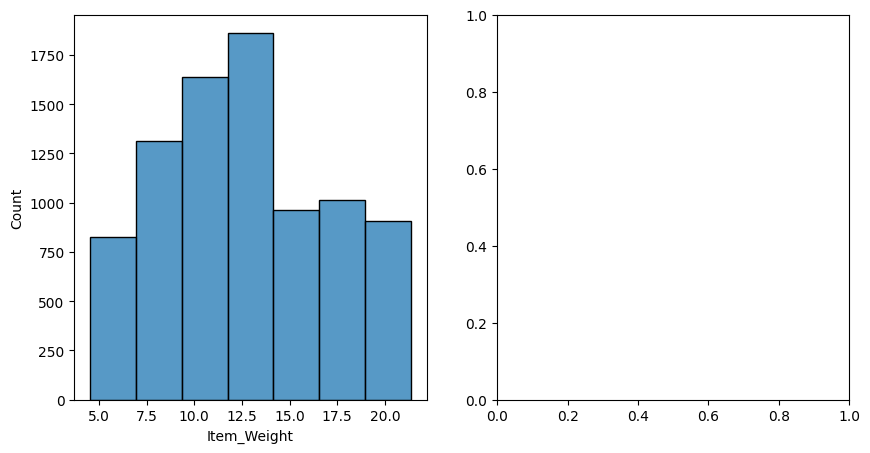

In [26]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(x = 'Item_Weight', data = data, binwidth= 2.5, ax = axes[0])
sns.histplot(x = 'Outlet_Size', data = data, ax = axes[1])

In [ ]:
train_features = data.copy()

In [ ]:
train_features = data.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'], axis = 1)
train_features = pd.get_dummies(train_features, drop_first = True)
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Size_13.99947935473579,Outlet_Size_13.999831391298898,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,249.8092,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1,5.92,0,48.2692,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,17.50,0,141.6180,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.20,0,182.0950,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,8.93,0,53.8614,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
